# Conducción de calor a través de una barra compuesta de diámetro uniforme.
El siguiente código gráfica a lo largo de un conductor lineal de calor su respectiva regresión lineal, siendo posible encontrar la conductividad térmica de una barra compuesta por bronce y acero inoxidable.

## Objetivos.
- Conocer el funcionamiento del equipo de conducción de calor disponible en el Laboratorio de
Operaciones Unitarias.
- Comprobar la ley de conducción de Fourier.
- Obtener perfiles de temperatura para el sistema de conducción lineal y radial.
- Calcular la conductividad térmica del bronce y del acero inoxidable, empleando la unidad de conducción de calor lineal y radial.

Partiendo de la ecuación de conducción de Fourier: <br>
$K=\frac{Q * (\frac{\Delta X} {\Delta T})} {A}$

Conociendo los valores de potencia suministrada Q, área seccional A y obteniendo a partir de la pendiente de la gráfica del estado estacionario el valor de $\frac {\Delta X} {\Delta T}$, se puede calcular la conductividad térmica.

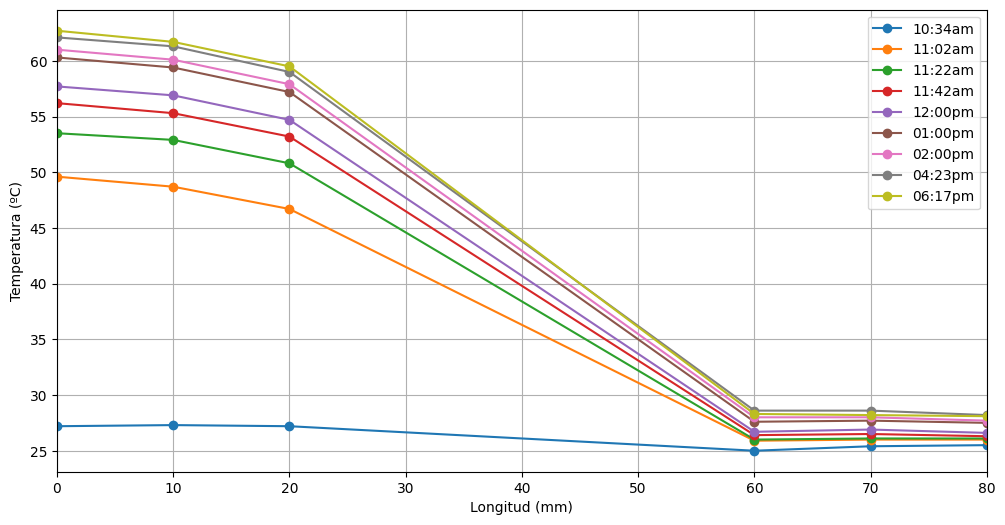

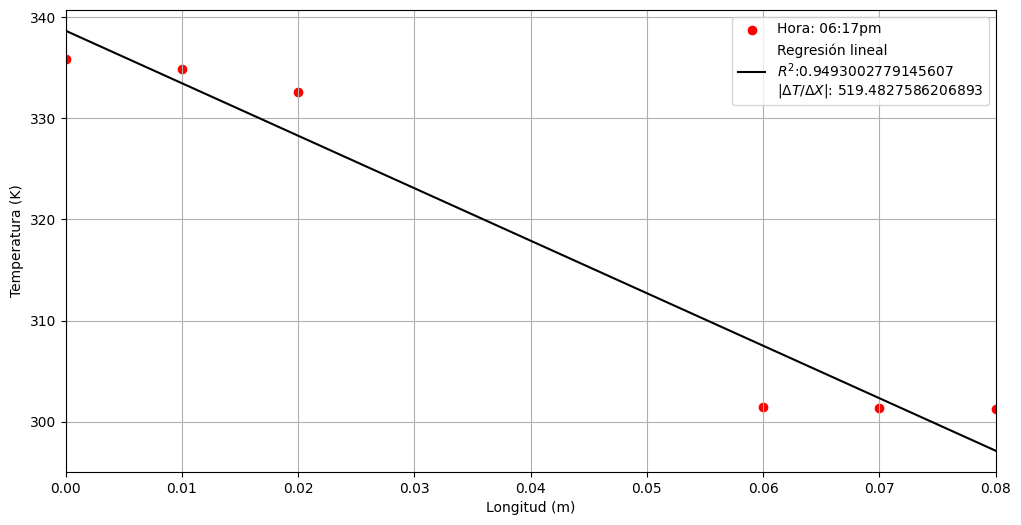

Gradiente de temperatura: -0.0019249917026219728 m/ºC 
Área seccional: 0.0004908738521234052 m^2 
Conductividad térmica: -19.215648383072473


In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

data = pd.DataFrame({"10:34am": [27.2, 27.3, 27.2, 25, 25.4, 25.5],
                     "11:02am": [49.6, 48.7, 46.7, 25.9, 26, 26],
                     "11:22am": [53.5, 52.9, 50.8, 26, 26.1, 26.1],
                     "11:42am": [56.2, 55.3, 53.2, 26.4, 26.5, 26.3],
                     "12:00pm": [57.7, 56.9, 54.7, 26.7, 26.9, 26.6],
                     "01:00pm": [60.3, 59.4, 57.2, 27.6, 27.7, 27.5],
                     "02:00pm": [61, 60.1, 57.9, 28, 28, 27.7],
                     "04:23pm": [62.1, 61.3, 59, 28.6, 28.6, 28.2],
                     "06:17pm": [62.7, 61.7, 59.5, 28.3, 28.2, 28.1]
                     })

dist= np.array([0, 10, 20, 60, 70, 80])

model = LinearRegression()
model.fit((dist/1000).reshape(-1,1) , data["06:17pm"] + 273.15)
r_sq = model.score((dist/1000).reshape(-1,1), data["06:17pm"] + 273.15)

x = np.linspace(0, 80/1000, 100)
y = model.coef_ * x + model.intercept_

plt.figure(figsize=(12,6))
for hour in data:
  plt.plot(dist, data[hour], label=hour, marker="o")
plt.xlabel("Longitud (mm)")
plt.ylabel("Temperatura (ºC)")
plt.xlim(0,80)
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(12,6))
plt.scatter(dist / 1000, data["06:17pm"] + 273.15, label="Hora: 06:17pm", color="red")
plt.plot(x, y, label=f"Regresión lineal\n$R^2$:{r_sq}\n$|\Delta T / \Delta X|$: {abs(model.coef_[0])}", color="black")
plt.xlabel("Longitud (m)")
plt.ylabel("Temperatura (K)")
plt.xlim(0,80/1000)
plt.legend()
plt.grid()
plt.show()

Q = 4.9
grad = (1/model.coef_[0])
A = np.pi * ((25 / 1000) / 2) ** 2
K = (Q * grad) / A
print(f"Gradiente de temperatura: {grad} m/ºC \nÁrea seccional: {A} m^2 \nConductividad térmica: {K}")
